In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [84]:
# dataset @ https://finance.yahoo.com/quote/BTC-USD/history/

df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-14,3677.990479,3758.533447,3583.019531,3601.013672,3601.013672,16541142667
1,2019-01-21,3600.372803,3654.933105,3539.721436,3583.965820,3583.965820,36949379050
2,2019-01-28,3584.283203,3586.750977,3400.819824,3464.013428,3464.013428,40130888766
3,2019-02-04,3467.211670,3695.614014,3391.023682,3690.188232,3690.188232,41224140801
4,2019-02-11,3695.613037,3695.613037,3607.697754,3673.836182,3673.836182,44533597993


In [85]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [86]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date'].head()

0   2019-01-14
1   2019-01-21
2   2019-01-28
3   2019-02-04
4   2019-02-11
Name: Date, dtype: datetime64[ns]

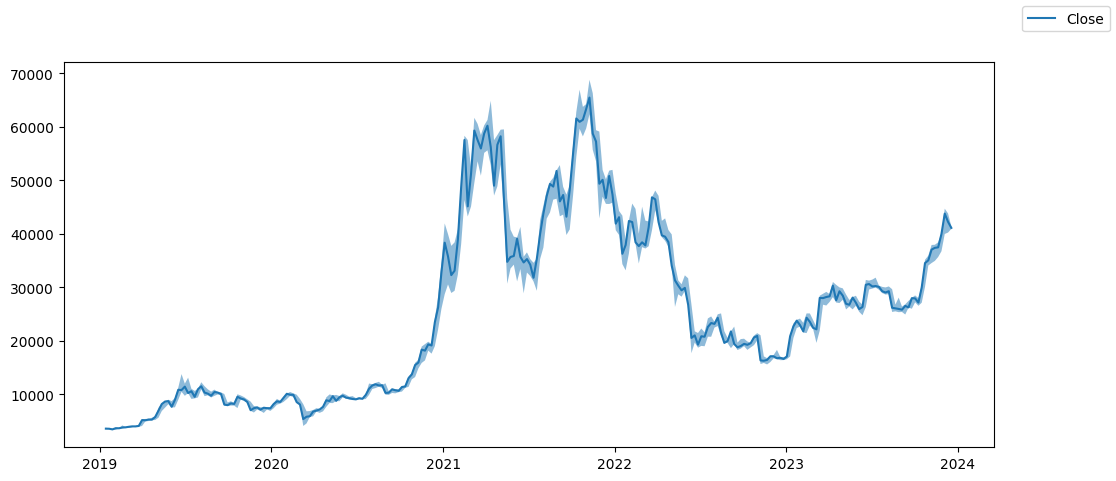

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df["Date"], df['Close'])
ax.fill_between(df["Date"], df['Low'], df['High'], alpha=.5, linewidth=0)
fig.legend(["Close"])

<BarContainer object of 258 artists>

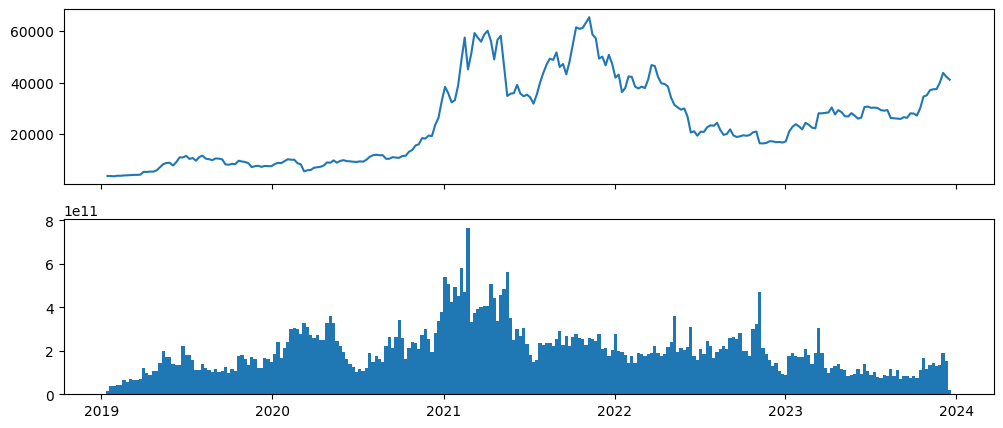

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 5))
ax1.plot(df['Date'], df['Close'])
ax2.bar(df['Date'], df['Volume'], width=7)

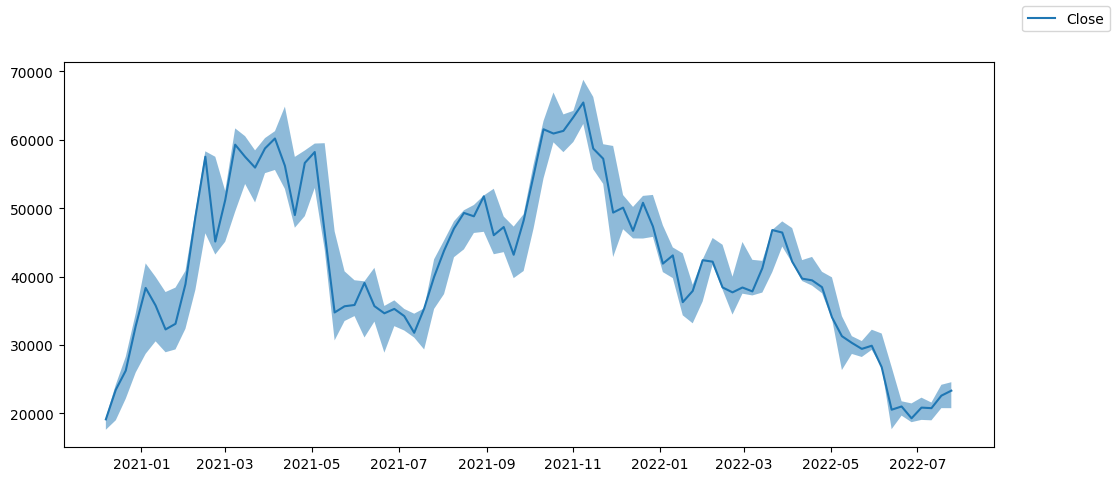

In [89]:
df_pic_price = df[(df['Date'] > str_to_datetime('2020-12-01')) & (df['Date'] < str_to_datetime('2022-08-01'))]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_pic_price["Date"], df_pic_price['Close'])
ax.fill_between(df_pic_price["Date"], df_pic_price['Low'], df_pic_price['High'], alpha=.5, linewidth=0)
fig.legend(["Close"])

<BarContainer object of 86 artists>

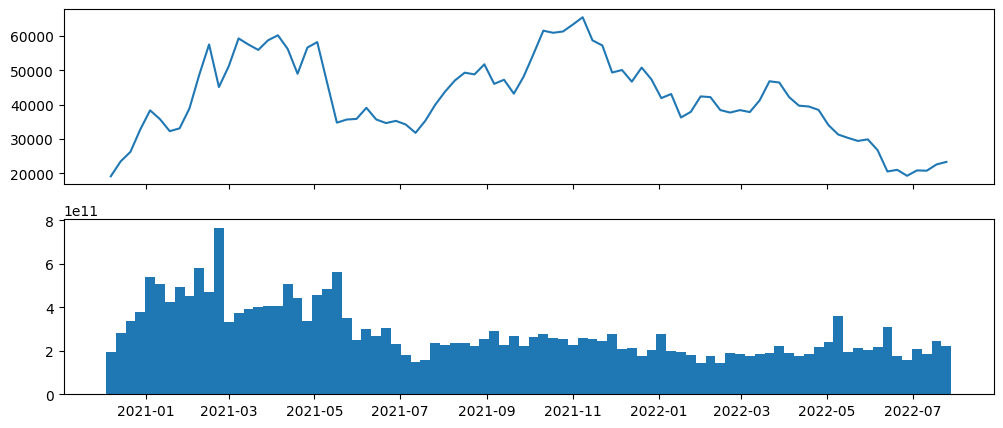

In [90]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 5))
ax1.plot(df_pic_price['Date'], df_pic_price['Close'])
ax2.bar(df_pic_price['Date'], df_pic_price['Volume'], width=7)

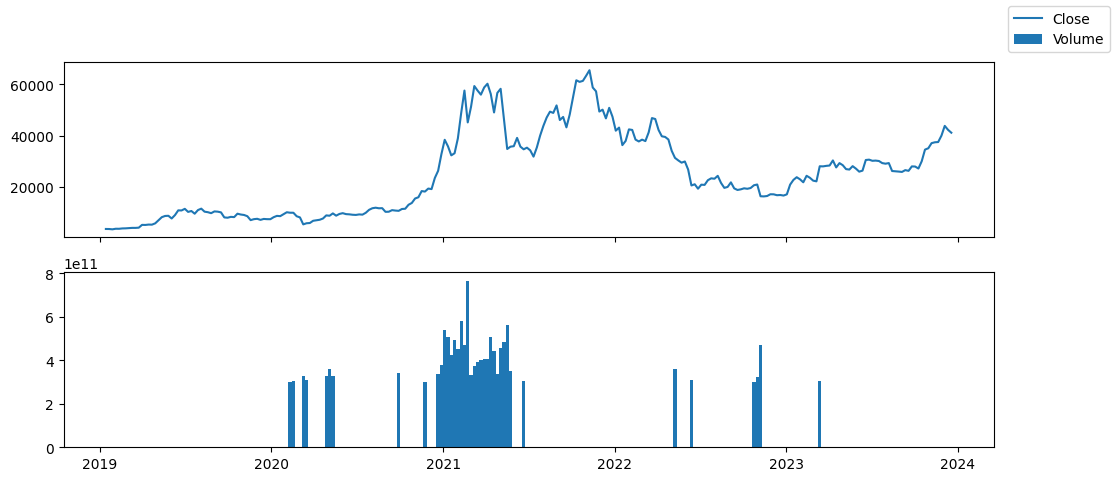

In [91]:
over_300bill = df[df['Volume']>300000000000]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 5))
ax1.plot(df['Date'], df['Close'])
ax2.bar(over_300bill["Date"], over_300bill['Volume'], width=7)
fig.legend(["Close", "Volume"])